# 1. Creating a Google Colaboratory File


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/"


 archive.zip			     'Mert_Bulut_152120181101 (2).ipynb'
 AygazBootcamp_mertbulut.ipynb	     'Mert_Bulut_152120181101 (3).ipynb'
'Başlıksız Diyagram.drawio'	      Mert_Bulut_152120181101.ipynb
'DeepProje (1).ipynb'		      pytorch_project_demo.ipynb
 DeepProje.ipynb		      time_series_gru_gear_demo.ipynb
 dl_project_demo.ipynb		      Untitled8.ipynb
'Mert_Bulut_152120181101 (1).ipynb'


In [3]:
!cp "/content/drive/My Drive/Colab Notebooks/archive.zip" "/content/"

In [4]:
if 1:
    ! cp /content/archive.zip /content/
    ! unzip /content/archive.zip -d /content/archive

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/archive/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: /content/archive/Images/n02108089-boxer/n02108

In [1]:
!pip install tensorflow

# 2. Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# 3. Data Preprocessing

In [3]:
import os
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Function to load and preprocess the image given a file path
def load_and_preprocess_image(file_path, target_size=(128, 128)):
    # Load the image and resize it to the target size
    image = load_img(file_path, target_size=target_size)
    # Convert the image to a numpy array and normalize it
    image = img_to_array(image) / 255.0
    return image

# Function to scan your folder structure and create a DataFrame
def create_dataframe(directory_path):
    data = []
    # For each subdirectory (breed) in the directory
    for subdir in os.listdir(directory_path):
        # Find all image files in the subdirectory
        files = glob.glob(os.path.join(directory_path, subdir, '*.jpg'))
        # For each file
        for f in files:
            # Append the file path and label (breed) to the data list
            data.append({'image_path': f, 'label': subdir})
    # Create and return a DataFrame from the data list
    return pd.DataFrame(data)

# Create a DataFrame from your images directory
df = create_dataframe('/content/archive/Images')

# Load and preprocess each image using the 'image_path' column
df['image'] = df['image_path'].apply(lambda x: load_and_preprocess_image(x, target_size=(128, 128)))

# Encode labels to a numerical format
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Convert images and labels into numpy arrays
X = np.array(df['image'].tolist())
y = to_categorical(df['label'])

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to be between 0 and 1 for all datasets
X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

# 4. Building a Model

In [4]:
# Define image dimensions and number of classes
IMG_WIDTH, IMG_HEIGHT = 128, 128  # Adjust these values based on your dataset
NUM_CLASSES = 120  # Update this value to the number of dog breeds you have

In [5]:
# Building the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Use softmax for multi-class classification
])

In [6]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
# Train the model - adjust the number of epochs and batch size as needed
EPOCHS = 10  # The number of epochs to train for
BATCH_SIZE = 32  # The size of the batch used in the mini-batch gradient descent
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/10
451/451 [==============================] - 17s 25ms/step - loss: 4.7863 - accuracy: 0.0096 - val_loss: 4.7845 - val_accuracy: 0.0117
Epoch 2/10
451/451 [==============================] - 10s 21ms/step - loss: 4.7825 - accuracy: 0.0121 - val_loss: 4.7838 - val_accuracy: 0.0117
Epoch 3/10
451/451 [==============================] - 10s 22ms/step - loss: 4.7809 - accuracy: 0.0110 - val_loss: 4.7840 - val_accuracy: 0.0117
Epoch 4/10
451/451 [==============================] - 10s 22ms/step - loss: 4.7805 - accuracy: 0.0121 - val_loss: 4.7840 - val_accuracy: 0.0117
Epoch 5/10
451/451 [==============================] - 10s 22ms/step - loss: 4.7800 - accuracy: 0.0121 - val_loss: 4.7844 - val_accuracy: 0.0117
Epoch 6/10
451/451 [==============================] - 10s 22ms/step - loss: 4.7802 - accuracy: 0.0112 - val_loss: 4.7844 - val_accuracy: 0.0117
Epoch 7/10
451/451 [==============================] - 10s 22ms/step - loss: 4.7799 - accuracy: 0.0115 - val_loss: 4.7840 - val_accuracy:

In [9]:
# Plot the training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

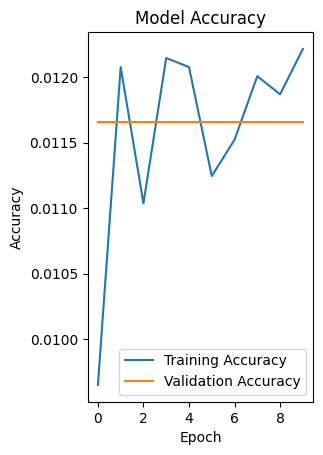

In [10]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

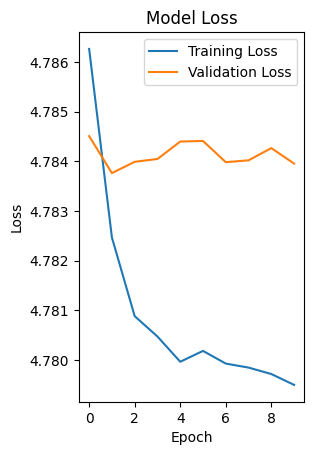

In [11]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# 5. Hyper-parameter Optimization

In [13]:
!pip install -q -U keras-tuner

In [14]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()

    # Tune the number of filters in the first Conv2D layer
    hp_filters = hp.Int('filters', min_value=32, max_value=128, step=32)
    model.add(Conv2D(hp_filters, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
    model.add(MaxPooling2D(2, 2))

    # Tune whether to use Dropout and its rate
    if hp.Boolean('dropout'):
        dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
        model.add(Dropout(rate=dropout_rate))

    model.add(Flatten())

    # Tune the number of units in the Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))

    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

<ipython-input-14-80ab209d79be>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [15]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Create a callback to stop training early after reaching a certain value for the validation loss
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [16]:
# Execute the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])

Trial 28 Complete [00h 03m 04s]
val_accuracy: 0.030126336961984634

Best val_accuracy So Far: 0.03271785005927086
Total elapsed time: 00h 38m 21s


In [17]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.0001.



In [18]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
451/451 [==============================] - 11s 22ms/step - loss: 4.7870 - accuracy: 0.0096 - val_loss: 4.7864 - val_accuracy: 0.0123
Epoch 2/50
451/451 [==============================] - 8s 18ms/step - loss: 4.7845 - accuracy: 0.0102 - val_loss: 4.7846 - val_accuracy: 0.0117
Epoch 3/50
451/451 [==============================] - 8s 18ms/step - loss: 4.7787 - accuracy: 0.0124 - val_loss: 4.7772 - val_accuracy: 0.0172
Epoch 4/50
451/451 [==============================] - 8s 19ms/step - loss: 4.7632 - accuracy: 0.0159 - val_loss: 4.7598 - val_accuracy: 0.0152
Epoch 5/50
451/451 [==============================] - 8s 18ms/step - loss: 4.7331 - accuracy: 0.0166 - val_loss: 4.7289 - val_accuracy: 0.0175
Epoch 6/50
451/451 [==============================] - 8s 18ms/step - loss: 4.6960 - accuracy: 0.0183 - val_loss: 4.6931 - val_accuracy: 0.0185
Epoch 7/50
451/451 [==============================] - 8s 18ms/step - loss: 4.6588 - accuracy: 0.0208 - val_loss: 4.6627 - val_accuracy: 0.021

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

97/97 [==============================] - 1s 6ms/step - loss: 4.4380 - accuracy: 0.0437
Test Loss: 4.437957763671875, Test Accuracy: 0.04373177886009216


In [20]:
model.save('dog_breed_classifier_model.h5')  # Saves the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
